# Examen Análisis Aplicado
- **Nombre**: Sergio Iván Arroyo Giles
- **Clave Única**: 157853

In [22]:
import pandas as pd
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [20]:
datos = pd.read_csv("crime_data.csv")
datos.describe()

,lat,long
count,31056.000000,31056.000000
mean,19.393666,-99.130766
std,0.065004,0.060586
min,19.250780,-99.306177
25%,19.345276,-99.175350
50%,19.388652,-99.132440
75%,19.442973,-99.087178
max,19.578350,-98.973727


Para cada tipo de crimen consideremos una ponderación basada en las cantidades. 

In [14]:
datos['crime'].value_counts()/datos['crime'].count()

ROBO A TRANSEUNTE C.V.             0.278207
ROBO DE VEHICULO AUTOMOTOR S.V.    0.211489
ROBO A NEGOCIO C.V.                0.114116
ROBO DE VEHICULO AUTOMOTOR C.V.    0.099240
ROBO A REPARTIDOR C.V.             0.058121
ROBO A TRANSEUNTE S.V.             0.048815
HOMICIDIO DOLOSO                   0.033037
VIOLACION                          0.031009
ROBO A BORDO DE METRO S.V.         0.024665
LESIONES POR ARMA DE FUEGO         0.021123
ROBO A REPARTIDOR S.V.             0.018386
ROBO A CASA HABITACION C.V.        0.017774
ROBO A BORDO DE MICROBUS C.V.      0.015424
ROBO A CUENTAHABIENTE C.V.         0.012494
ROBO A BORDO DE TAXI C.V.          0.005506
ROBO A BORDO DE METRO C.V.         0.004894
ROBO A TRANSPORTISTA C.V.          0.002737
ROBO A BORDO DE MICROBUS S.V.      0.002093
SECUESTRO                          0.000708
ROBO A TRANSPORTISTA S.V.          0.000161
Name: crime, dtype: float64

In [21]:
datos['crime'].value_counts()

ROBO A TRANSEUNTE C.V.             8640
ROBO DE VEHICULO AUTOMOTOR S.V.    6568
ROBO A NEGOCIO C.V.                3544
ROBO DE VEHICULO AUTOMOTOR C.V.    3082
ROBO A REPARTIDOR C.V.             1805
ROBO A TRANSEUNTE S.V.             1516
HOMICIDIO DOLOSO                   1026
VIOLACION                           963
ROBO A BORDO DE METRO S.V.          766
LESIONES POR ARMA DE FUEGO          656
ROBO A REPARTIDOR S.V.              571
ROBO A CASA HABITACION C.V.         552
ROBO A BORDO DE MICROBUS C.V.       479
ROBO A CUENTAHABIENTE C.V.          388
ROBO A BORDO DE TAXI C.V.           171
ROBO A BORDO DE METRO C.V.          152
ROBO A TRANSPORTISTA C.V.            85
ROBO A BORDO DE MICROBUS S.V.        65
SECUESTRO                            22
ROBO A TRANSPORTISTA S.V.             5
Name: crime, dtype: int64

De este modo, podemos ponderar cada crimen por la tasa de incidencia de cada uno de ellos. Como el objetivo de este programa es minimizar la incidencia de crímenes de la siguiente manera:
#### Definiciones y notación:
- $x_i$: Posición de la cámara $i$, con $i=1,2,\ldots,I$;
- $c_k$: Ponderación del tipo de crimen $k$, con $k=1,2,\ldots,K$;
- $y_j^k$: Posición del $j$-ésimo crimen de tipo $k$ en , con $j=1,2,\ldots,J_k$;


donde $I$ es el número de cámaras a colocar ($I=8,000$), $K$ es la cantidad de tipos de crimen cometidos ($K=20$), y $J_k$ es la cantidad de crímenes cometidos de tipo $k$ (en la tabla anterior pueden observarse estas cantidades).

$$\underset{x\in S}{\text{mín}}\sum_{k=1}^{K}c_j\sum_{j=1}^{J_k}\sum_{i=1}^{I}d_M(x_i,y_j^k)$$

donde $d_M(\mathbf{x},\mathbf{y}) = ||\mathbf{x}-\mathbf{y}||_1$ es la distancia de Manhattan entre dos puntos.
De este modo, el problema se trata de minimizar combinación convexa de la suma de las distancias de distancia de Manhattan entre las coordenadas de los crímenes y la posición de las cámaras.

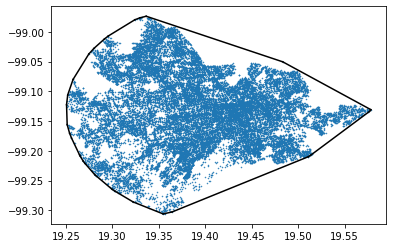

In [43]:
coordenadas = datos[['lat', 'long']].to_numpy()
hull = ConvexHull(coordenadas)
plt.plot(coordenadas[:,0], coordenadas[:,1], 'o', markersize = 0.5, )
for simplex in hull.simplices:
    plt.plot(coordenadas[simplex, 0], coordenadas[simplex, 1], 'k-')
plt.show()